In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro

pd.options.display.float_format = "{:.2f}".format

In [2]:
df = pd.read_excel("3. Case 2 - One-sample t-test.xlsx")

In [3]:
# Print data head
df.head()

,Product ID,Product Name,Price,Volume,Volume_in_liters,Price_per_EQ
0,5113468,Apple Pulse,4.15,500,0.50,8.30
1,1906188,Banana Pulse,4.75,500,0.50,9.50
2,5709623,Banana Rumble,4.30,500,0.50,8.60
3,2642672,Berry Ride,4.55,500,0.50,9.10
4,1997170,Blackberry Sizzle,4.20,500,0.50,8.40


In [4]:
# Descriptive statistics for the 'Price_per_EQ' variable
df["Price_per_EQ"].describe()

count   100.00
mean      6.43
std       1.37
min       3.02
25%       5.42
50%       6.24
75%       7.43
max       9.50
Name: Price_per_EQ, dtype: float64

The sample mean (6.43) is greater than the population mean (6.21). But is this difference statistically significant?

In [5]:
# Variable data to array
data = df["Price_per_EQ"].values

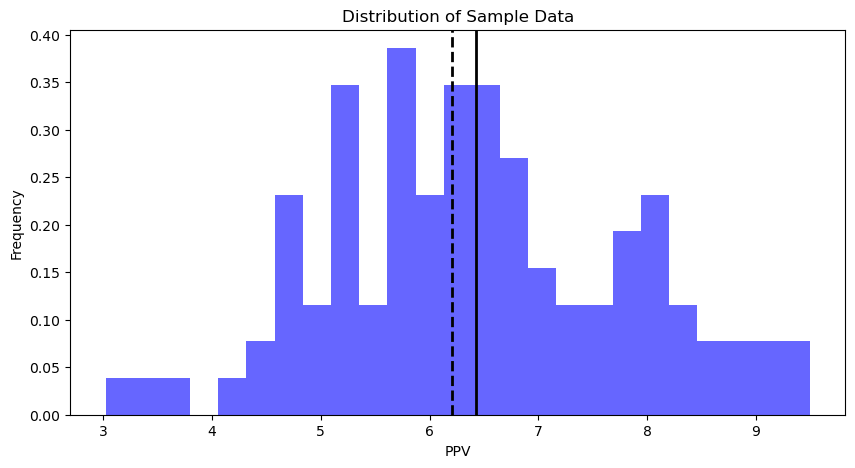

In [6]:
# Plot the histogram
plt.figure(figsize=(10,5))
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')

# Add the line for the mean of the data
plt.axvline(data.mean(), color='k', linestyle='solid', linewidth=2)

# Add dashed line at 6.21 for industry average
plt.axvline(6.21, color='k', linestyle='dashed', linewidth=2)

# Label axis and add title
plt.xlabel('PPV')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Data')

plt.show()

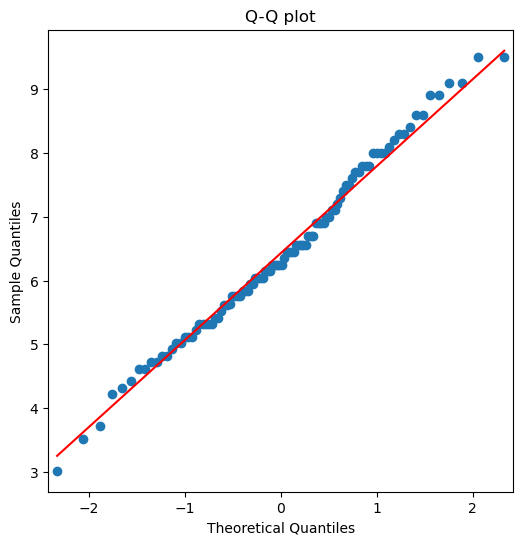

In [7]:
# Create Q-Q plot for PPV
fig, ax = plt.subplots(figsize=(6,6))
sm.qqplot(data, line='s', ax=ax, fmt='b')

# Set the chart title and axis labels
ax.set_title("Q-Q plot")

# Display the chart
plt.show()

The null and alternative hypotheses of this test are the following:
- H0: µPPV = 6.21 ("the mean PPV is equal to 6.21")
- H1: µPPV > 6.21  ("the mean PPV is higher than 6.21")

Furthermore, let's set the significance level alpha at 0.05

In [8]:
# Perform one-sample t-test (one-tailed, higher)
stats.ttest_1samp(a=data, popmean=6.21, alternative = "greater")

TtestResult(statistic=1.5858764248796753, pvalue=0.05797822784307917, df=99)

The p-value (0.0580) is greater than 0.05—meaning that we can’t reject the null hypothesis. Although the mean price per volume of the products in the sample (6.43) is slightly greater than the population mean (6.21), it is not *significantly* greater at the level of 0.05.

Now let's re-do the test, this time with the opposite alternative hypothesis:
    
- H0: µPPV = 6.21  ("the mean PPV is equal to 6.21")
- H1: µPPV < 6.21  ("the mean PPV is lower than 6.21")

In [9]:
# Re-run one-sample t-test with different alternative hypothesis (one-tailed, lower)
stats.ttest_1samp(a=data, popmean=6.21, alternative = "less")

TtestResult(statistic=1.5858764248796753, pvalue=0.9420217721569208, df=99)

In this case, the p-value (0.9420) is close to 1, much greater than 0.05. We cannot reject the null hypothesis and conclude that the mean price per volume of the sample products is not less than 6.21. 